# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


---
## 2. Load data

In [2]:
client_df = pd.read_csv('client_data_after_eda.csv')

In [3]:
print(client_df.shape)
client_df.head(3)

(14606, 23)


,id,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,margin_gross_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,0.098142,40.606701,t,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000,44.311378,f,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.087899,44.311378,f,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df = pd.read_csv('price_data_after_eda.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [5]:
print(price_df.shape)
price_df.head(3)

(193002, 6)


,id,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,44.266931,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,44.266931,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,44.266931,0.0


---

## 3. Feature engineering

### We will create 3 different sets of price features to measure sensitivity as proposed in the EDA 

### 1) Mean of the prices (fixed & variable) from preceding year (January to December 2015)
### 2) Difference between prices (fixed & variable) from January to December 2015
### 3) Variance in prices (fixed & variable) from January to December 2015

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
# Group prices by companies and month

monthly_price_by_id = price_df.groupby(['id', 'price_date']).mean().reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,40.565969,24.339581
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,40.565969,24.339581
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,40.728885,24.437330
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,40.728885,24.437330
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,40.728885,24.437330
...,...,...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,0.102232,40.728885,24.437330
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,0.102232,40.728885,24.437330
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,0.102232,40.728885,24.437330
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,0.102232,40.728885,24.437330


In [7]:
# Get January and December prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff_prices = dec_prices.iloc[:,2:] - jan_prices.iloc[:,2:]

# Rename the columns
col_list = ['diff_'+col for col in diff_prices.columns]
diff_prices.columns = col_list
diff_prices.insert(loc=0, column='id', value=dec_prices.id)

In [8]:
# Also calculate the mean prices & variance of prices for the period  

mean_prices = monthly_price_by_id.groupby('id').mean().reset_index().iloc[:,1:]
col_list = ['mean_'+col for col in mean_prices.columns]
mean_prices.columns = col_list

var_prices = monthly_price_by_id.groupby('id').var().reset_index().iloc[:,1:]
col_list = ['var_'+col for col in var_prices.columns]
var_prices.columns = col_list

In [9]:
price_df = pd.concat([diff_prices, mean_prices, var_prices], axis=1)
price_df

,id,diff_price_off_peak_var,diff_price_peak_var,diff_price_off_peak_fix,diff_price_peak_fix,mean_price_off_peak_var,mean_price_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_off_peak_fix,var_price_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.162916,0.097749,0.124338,0.103794,40.701732,24.421038,0.000016,0.000004,4.021438e-03,0.001448
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.177779,0.000000,0.146426,0.000000,44.385450,0.000000,0.000005,0.000000,7.661891e-03,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,1.500000,0.000000,0.181558,0.000000,45.319710,0.000000,0.000676,0.000000,5.965909e-01,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,-0.005120,0.162916,0.097749,0.118757,0.098292,40.647427,24.388455,0.000025,0.000007,7.238536e-03,0.002606
4,00114d74e963e47177db89bc70108537,-0.003994,0.000000,-0.000001,0.000000,0.147926,0.000000,44.266930,0.000000,0.000005,0.000000,3.490909e-13,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.038788,-0.335085,-0.400251,0.138863,0.115125,40.896427,24.637456,0.000688,0.000422,3.062232e-02,0.043691
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.000000,0.177779,0.000000,0.147137,0.000000,44.311375,0.000000,0.000004,0.000000,6.464760e-03,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-0.003707,0.164916,0.099749,0.153879,0.129497,41.160171,24.895768,0.000009,0.000006,7.211360e-03,0.002638
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-0.004937,0.162916,0.097749,0.123858,0.103499,40.606699,24.364017,0.000021,0.000006,5.428835e-03,0.001954


In [10]:
# Check for missing values in price_df
price_df.isnull().sum()

id                         0
diff_price_off_peak_var    0
diff_price_peak_var        0
diff_price_off_peak_fix    0
diff_price_peak_fix        0
mean_price_off_peak_var    0
mean_price_peak_var        0
mean_price_off_peak_fix    0
mean_price_peak_fix        0
var_price_off_peak_var     0
var_price_peak_var         0
var_price_off_peak_fix     0
var_price_peak_fix         0
dtype: int64

### Date Features

### Since it's difficult to work directly with the date data, we will convert date columns into number of months/years from each date to the reference date of our data (January 2016)

In [11]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], format='%Y-%m-%d')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'], format='%Y-%m-%d')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'], format='%Y-%m-%d')

In [12]:
# Convert date columns into number of months from each date to the reference date of our data (January 2016)

for col in ['date_activ','date_end','date_modif_prod','date_renewal']:   
    col_name = col.split('_')[1]
    reference_date = datetime.datetime(2016,1,1)
    time_delta = reference_date - client_df['date_activ']
    client_df['months_'+col_name] = (time_delta / np.timedelta64(1, "M")).astype(int)
client_df.drop(['date_activ','date_end','date_modif_prod','date_renewal'], 1, inplace=True)

## 4. Encoding of Features

In [13]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,months_activ,months_end,months_modif,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.00,0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,30,30,30,30
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,189.95,0,0.0,16.27,0.145711,0.000000,...,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,76,76,76,76
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,47.96,0,0.0,38.72,0.165794,0.087899,...,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,68,68,68,68
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,240.04,0,0.0,19.83,0.146694,0.000000,...,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,69,69,69,69
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,445.75,526,0.0,131.73,0.116900,0.100015,...,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,71,71,71,71


In [14]:
# Do One-Hot encoding for channel_sales and origin_up

dummies_channel_sales = pd.get_dummies(client_df['channel_sales'])

dummies_origin_up = pd.get_dummies(client_df['origin_up'])

In [15]:
dummies_channel_sales.drop('MISSING', 1, inplace=True)

# Rename dummy columns

col_list = ['channel_'+col[:4] for col in dummies_channel_sales.columns]
dummies_channel_sales.columns = col_list
dummies_channel_sales

,channel_epum,channel_ewpa,channel_fixd,channel_foos,channel_lmke,channel_sddi,channel_usil
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14601,0,0,0,1,0,0,0
14602,0,0,0,1,0,0,0
14603,0,0,0,1,0,0,0
14604,0,0,0,1,0,0,0


In [16]:
dummies_origin_up.drop('MISSING', 1, inplace=True)

# Rename dummy columns

col_list = ['origin_'+col[:4] for col in dummies_origin_up.columns]
dummies_origin_up.columns = col_list
dummies_origin_up

client_df.drop(['channel_sales','origin_up'], axis=1, inplace=True)

In [17]:
# Label encoding of 'has_gas' column

client_df.has_gas.replace({'f':0,'t':1}, inplace=True)

In [18]:
# Finally merge it with price features obtained earlier

client_df = pd.concat([client_df, dummies_channel_sales, dummies_origin_up], axis=1)

client_prices = pd.merge(client_df, price_df, how='left', on='id')
client_prices

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,diff_price_off_peak_fix,diff_price_peak_fix,mean_price_off_peak_var,mean_price_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_off_peak_fix,var_price_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3.700961,-24.339581,0.124787,0.100749,40.942265,22.352010,0.000061,2.627605e-05,1.102785e+00,49.550703
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,0.177779,0.000000,0.149609,0.007124,44.311375,0.000000,0.000005,6.089453e-04,6.464779e-03,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,0.177779,0.000000,0.170512,0.088421,44.385450,0.000000,0.000006,2.558511e-07,7.661891e-03,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,0.177779,0.000000,0.151210,0.000000,44.400265,0.000000,0.000005,0.000000e+00,6.464721e-03,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,0.162916,0.097749,0.124174,0.103638,40.688156,24.412893,0.000015,3.552481e-06,5.428942e-03,0.001954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,...,0.177779,0.000000,0.144124,0.000000,44.370635,0.000000,0.000015,0.000000e+00,8.380216e-03,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,...,0.236694,0.145963,0.106799,0.095406,59.015674,36.393379,0.000013,3.472391e-06,1.358132e-02,0.005165
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,...,0.162916,0.097749,0.124338,0.103794,40.701732,24.421038,0.000016,3.957295e-06,4.021438e-03,0.001448
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,...,0.177779,0.000000,0.149609,0.007124,44.311375,0.000000,0.000005,6.089453e-04,6.464769e-03,0.000000


## 5. Outlier Treatment and Transformation

In [19]:
# Removing outliers from numerical features
# There are two methods for removing outliers - a) using z score method & b) using iqr method

client_prices_num = client_prices.select_dtypes(include = ['float64','int64']).drop('churn',1)

# We will be using iqr method

q1 = client_prices_num.quantile(0.25)
q3 = client_prices_num.quantile(0.75)
iqr = q3-q1


client_prices_out = client_prices[~((client_prices_num < q1-1.5*iqr) | (client_prices_num > q3+1.5*iqr)).any(axis=1)]
client_prices_out.isnull().sum().sum()

# There are no null values in the final dataframe

0

In [20]:
# Final list of features

client_prices.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'margin_gross_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'churn', 'months_activ', 'months_end', 'months_modif',
       'months_renewal', 'channel_epum', 'channel_ewpa', 'channel_fixd',
       'channel_foos', 'channel_lmke', 'channel_sddi', 'channel_usil',
       'origin_ewxe', 'origin_kamk', 'origin_ldks', 'origin_lxid',
       'origin_usap', 'diff_price_off_peak_var', 'diff_price_peak_var',
       'diff_price_off_peak_fix', 'diff_price_peak_fix',
       'mean_price_off_peak_var', 'mean_price_peak_var',
       'mean_price_off_peak_fix', 'mean_price_peak_fix',
       'var_price_off_peak_var', 'var_price_peak_var',
       'var_price_off_peak_fix', 'var_price_peak_fix'],
      dtype='obje

In [21]:
client_info_columns = ['id','channel_sales', 'origin_up', 'nb_prod_act','num_years_antig','has_gas']
past_cons_columns = ['cons_12m', 'cons_gas_12m']
date_columns = [ 'months_activ','months_end', 'months_modif', 'months_renewal']
forecast_columns = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_price_energy_off_peak', 'forecast_price_pow_off_peak',
                    'forecast_price_energy_peak','forecast_discount_energy','forecast_meter_rent_12m']
present_cons_columns = ['pow_max', 'margin_gross_pow_ele', 'net_margin']

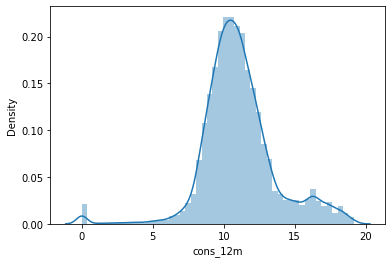

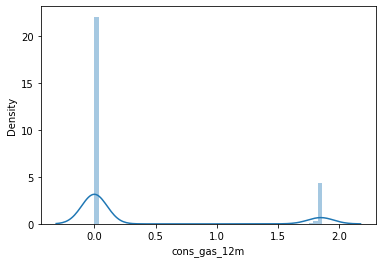

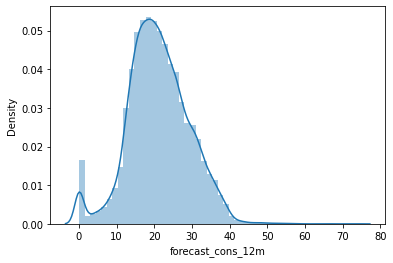

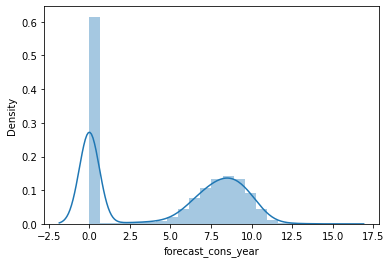

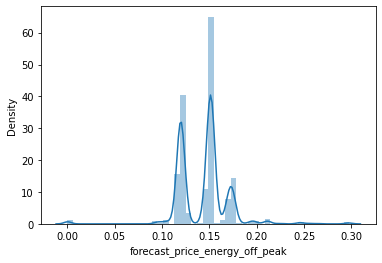

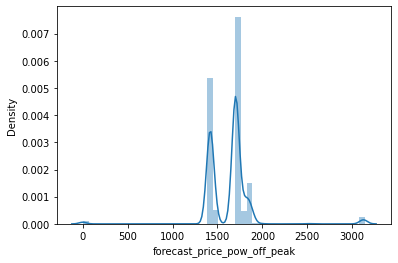

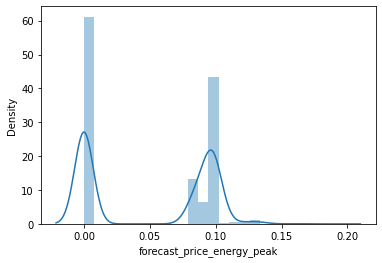

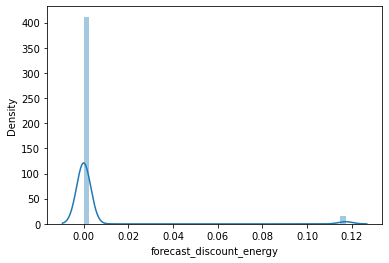

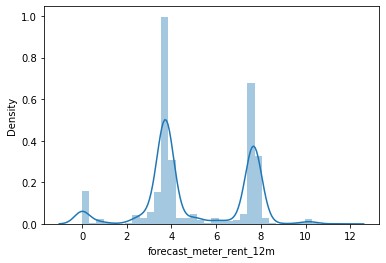

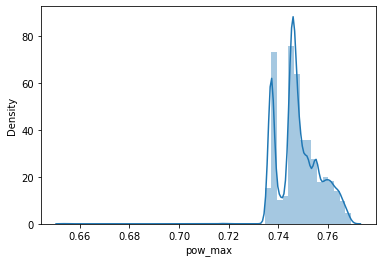

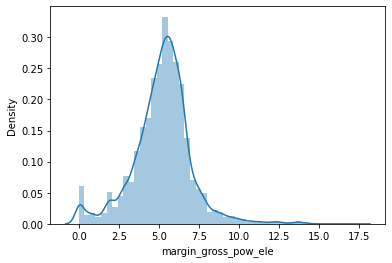

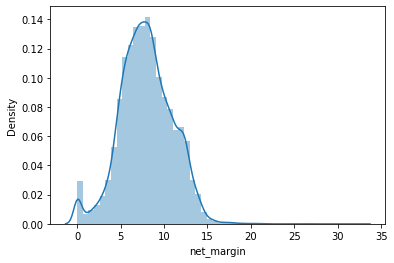

In [22]:
# Transform the highly skewed consumption and  forecast variables

from scipy.stats import boxcox

(client_prices[past_cons_columns + forecast_columns + present_cons_columns] <= 0).sum()

# Change the zero values by adding 1 in order to apply boxcox transformation
for col in past_cons_columns + forecast_columns + present_cons_columns:
    client_prices[col] = (client_prices[col]+1).astype('float')
    client_prices[col] = boxcox(client_prices[col])[0]
    sns.distplot(client_prices[col])
    plt.show()

## 6. Modelling

#### We will use Random Forest Classifier of sklearn and XGBoost to build our model. 
#### Random Forest Classifier (RFC) is an ensemble based model which works on the principle of bagging of decision tree models. It aggregates the results of multiple DT models working on different subsets of data. XGBoost is a boosting ensemble algorithm which acts as a general purpose good model

#### Advantages - 1) improves predicton by aggregating the results of several models and giving the average.
#### 2) Ensemble models are  ideal when there are large no of features with low/unknown predictive power.  
#### 3) They are less sensitive to outliers and multicollinearity in features.

#### Disadvantages - 1) Interpretation of results is more difficult 2) takes more time for training

In [23]:
X = client_prices.drop(['id','churn'], 1)
y = client_prices['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10954, 43) (3652, 43)
(10954,) (3652,)


In [24]:
y_train.value_counts()

0    9890
1    1064
Name: churn, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 10)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print('Report for train data \n', classification_report(y_train, y_train_pred))
print('Report for test data \n',classification_report(y_test, y_test_pred))

Report for train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       1.00      1.00      1.00      1064

    accuracy                           1.00     10954
   macro avg       1.00      1.00      1.00     10954
weighted avg       1.00      1.00      1.00     10954

Report for test data 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.86      0.05      0.10       355

    accuracy                           0.91      3652
   macro avg       0.89      0.53      0.53      3652
weighted avg       0.90      0.91      0.87      3652



In [27]:
# Calculate and store the prediction scores in a dataframe
df_scores = pd.DataFrame(columns = ['Precision','Recall','f1-score','Accuracy','Kappa'])
df_scores.loc['Random Forest'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]
df_scores

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.863636,0.053521,0.100796,0.907174,0.090477


In [28]:
# We will also compare with XGBoost model to assess the relative performance of both

import xgboost
xgb = xgboost.XGBClassifier(n_estimators = 100, random_state = 12, importance_type='total_gain', verbosity=0)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

df_scores.loc['XGBoost'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]
df_scores

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.863636,0.053521,0.100796,0.907174,0.090477
XGBoost,0.584615,0.107042,0.180952,0.905805,0.155545


### Summary of Model Evaluation:-

### We will use the precision and recall for 1's (churned) as the evaluation metric for our model.

### A high precision means that most of the predicted "churns" were correct while recall gives the proportion of actual "churns" that were correctly predicted. In any good classification model, there has to be a tradeoff between precision and recall, one increases as the other decreases 

### Since our dataset is highly imbalanced, we expect the model to correctly predict many of the 0's even if its a poor one. Hence accuracy is a poor evaluation metric in this case.

### Although our model has accurately predicted the 0's (No churn), the recall for 1's (churn) is very low
### Overfitting is present as the model precision & recall (1's) for test data is much lower than those obtained for train set

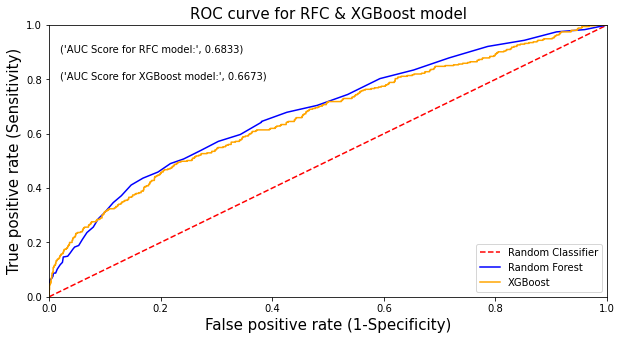

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10,5))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
plt.plot(fpr1, tpr1, color='blue')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for RFC model:',round(roc_auc_score(y_test, y_pred_prob),4)))

y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob)
plt.plot(fpr2, tpr2, color='orange')
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for XGBoost model:',round(roc_auc_score(y_test, y_pred_prob),4)))

## Labelling
plt.title('ROC curve for RFC & XGBoost model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(['Random Classifier','Random Forest','XGBoost'], loc='lower right')
plt.show()

### Receiver Operating Characteristics (ROC) curve is another useful way to visualize the ability of a model to separate the target classes. It plots the True Positive Rate against False Positive Rate for a set of thresholds
### From the ROC curve & AUC score, the model shows good separability between classes
### RFC model has a better performance based on AUC score and prediction scores.

### Finding optimum threshold:-
### Ideally, we want to maximize recall (correctly predicted churns) while keeping the precision above a tolerance threshold. This is importance since we are targeting the churn-likely customers for discount, hence false positives can be costly for the client. 
### We can increase the recall of true (1) values by setting a lower threshold for probabilities (0.1-0.2), but with a corresponding increase in rate of false positives. This is due to the effect of class imbalance in target.

In [30]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,1,0.01):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores.sort_values(by='f1-score', ascending=False).head()

,Precision,Recall,Accuracy,f1-score,Kappa
0.19,0.231379,0.411268,0.809967,0.296146,0.196131
0.18,0.21831,0.43662,0.793264,0.29108,0.185515
0.20,0.236136,0.371831,0.822015,0.28884,0.19287
0.21,0.24502,0.346479,0.832694,0.287048,0.195422
0.17,0.201983,0.459155,0.771084,0.280551,0.168248


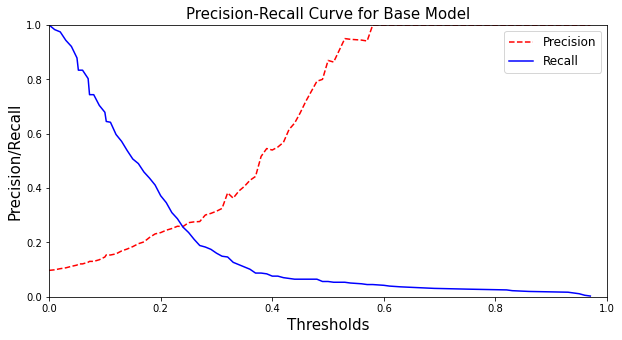

In [31]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(10,5))
plt.plot(thresholds, precision[:-1], 'r--', label = 'Precision')
plt.plot(thresholds, recall[:-1], 'b', label = 'Recall')
# plt.plot(recall, precision, 'b')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# plt.axhline(y=0.14, color='r', linestyle='-')

plt.title('Precision-Recall Curve for Base Model', fontsize = 15)
plt.xlabel('Thresholds', fontsize = 15)
plt.ylabel('Precision/Recall', fontsize = 15)
plt.legend(loc = 'best', fontsize = 12)

plt.show()

In [32]:
# If we want a 60% recall of 1's (churned), we have to set a threshold of 0.1
# There will be a corresponding low precision (20%) 
# If we want to balance the precision and recall, we will go for the optimum f1-score/kappa value

y_pred_new = [0 if x<0.2 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3297
           1       0.24      0.37      0.29       355

    accuracy                           0.82      3652
   macro avg       0.58      0.62      0.59      3652
weighted avg       0.86      0.82      0.84      3652



### Cross-validation of scores using statified k-fold sampling

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=cv)
print('ROC-AUC score of Random Forest Classifier =',scores.mean())
scores = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=cv)
print('ROC-AUC score of XGBoost Classifier =',scores.mean())

ROC-AUC score of Random Forest Classifier = 0.6769205396194677
ROC-AUC score of XGBoost Classifier = 0.6790410437934901


## 7. Model Interpretation

In [34]:
# Find the feature importance based on gini impurity for both RFC & XGB

rfc_importances = rfc.feature_importances_
xgb_importances = xgb.feature_importances_
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance_rf': rfc_importances, 'Importance_xgb': xgb_importances})

# Sort the dataframe in the descending order according to the feature importance

pd.set_option('display.float_format', lambda x: '%.5f' % x)
feature_importance = feature_importance.sort_values('Importance_rf', ascending = False)
feature_importance

,Features,Importance_rf,Importance_xgb
10,margin_gross_pow_ele,0.07496,0.11362
0,cons_12m,0.07235,0.10631
12,net_margin,0.06856,0.07710
5,forecast_meter_rent_12m,0.06684,0.06535
2,forecast_cons_12m,0.06377,0.06113
14,pow_max,0.05105,0.06207
35,mean_price_off_peak_var,0.04880,0.04844
39,var_price_off_peak_var,0.04414,0.05947
3,forecast_cons_year,0.04323,0.05032
31,diff_price_off_peak_var,0.04120,0.03945


In [35]:
feature_importance.iloc[:20,:].sum(axis=0, numeric_only=True)

# Top 20 features can capture more than 85% of the feature_importance for both models

Importance_rf    0.85049
Importance_xgb   0.87996
dtype: float64

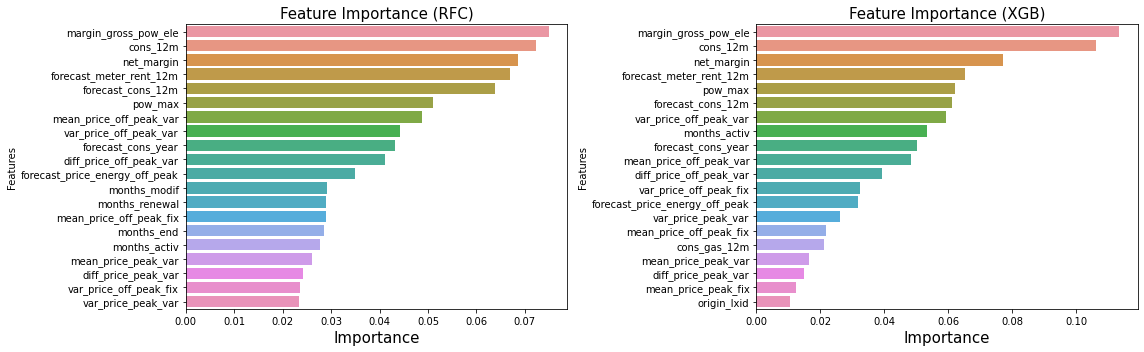

In [36]:
# Create a barplot to visualize the features based on their importance (top 20)
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_rf', y = 'Features', data = feature_importance[:20], ax=axes.flat[0])

feature_importance = feature_importance.sort_values('Importance_xgb', ascending = False)
sns.barplot(x = 'Importance_xgb', y = 'Features', data = feature_importance[:20], ax=axes.flat[1])

# Add plot and axes labels
# Set text size using 'fontsize'

axes.flat[0].set_title('Feature Importance (RFC)', fontsize = 15)
axes.flat[1].set_title('Feature Importance (XGB)', fontsize = 15)

for i in range(2):
    axes.flat[i].set_xlabel('Importance', fontsize = 15)

# display the plot
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

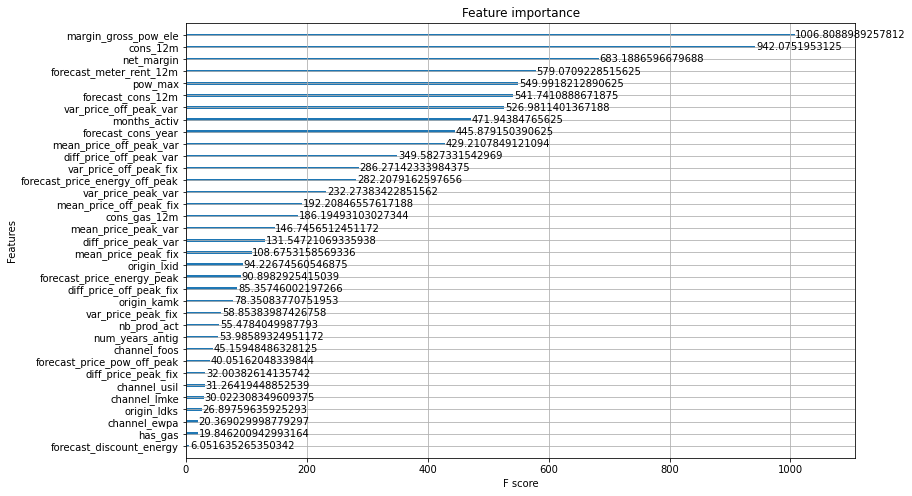

In [37]:
# Plotting using inbuilt function of xgboost

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
xgboost.plot_importance(xgb, ax=ax, importance_type='total_gain')

In [38]:
# Build Random Forest model based on best 20 features selected above

imp_feat = feature_importance.sort_values('Importance_rf', ascending = False).Features[:30].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25, stratify=y)

rfc_20 = RandomForestClassifier(n_estimators = 100, random_state = 10)
rfc_20.fit(X_train, y_train)
y_train_pred = rfc_20.predict(X_train)
y_test_pred = rfc_20.predict(X_test)

print(classification_report(y_test, y_test_pred))

df_scores.loc['Random Forest_Best20'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.89      0.05      0.09       355

    accuracy                           0.91      3652
   macro avg       0.90      0.52      0.52      3652
weighted avg       0.90      0.91      0.87      3652



In [39]:
# Build XGBoost model based on best 20 features selected above

imp_feat = feature_importance.sort_values('Importance_xgb', ascending = False).Features[:30].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25, stratify=y)

xgb_20 = xgboost.XGBClassifier(n_estimators = 100, random_state = 12)
xgb_20.fit(X_train, y_train)
y_train_pred = xgb_20.predict(X_train)
y_test_pred = xgb_20.predict(X_test)

print(classification_report(y_test, y_test_pred))
df_scores.loc['XGBoost_Best20'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2638
           1       0.57      0.11      0.18       284

    accuracy                           0.91      2922
   macro avg       0.74      0.55      0.56      2922
weighted avg       0.88      0.91      0.87      2922



In [40]:
print('AUC score for RFC-Best 20 features model =',cross_val_score(rfc_20, X_train, y_train, scoring='roc_auc', cv=cv))
print('AUC score for XGB-Best 20 features model =',cross_val_score(xgb_20, X_train, y_train, scoring='roc_auc', cv=cv))

df_scores

# RandomForest - there is a significant drop in AUC score
# XGBoost - no major change/drop in precision-recall and AUV score 

AUC score for RFC-Best 20 features model = 0.47508048671101666
AUC score for XGB-Best 20 features model = 0.6552085446721267


,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.86364,0.05352,0.10080,0.90717,0.09048
XGBoost,0.58462,0.10704,0.18095,0.90581,0.15554
Random Forest_Best20,0.88889,0.04507,0.08579,0.90663,0.07713
XGBoost_Best20,0.56604,0.10563,0.17804,0.90520,0.15212


## 8. Model Finetuning & Final Results

In [41]:
X = client_prices.drop(['id','churn'], 1)
y = client_prices['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25, stratify=y)

In [42]:
# We will use RandomizedSearchCV to find optimum hyperparameters for RFC model

from sklearn.model_selection import RandomizedSearchCV
params = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': range(100, 1000),
                     'max_depth': range(5,50),
                     'min_samples_split': range(2,11),
                     'min_samples_leaf': range(1,15)}]

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = RandomizedSearchCV(estimator = random_forest_classification, param_distributions = params, scoring='roc_auc', cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'n_estimators': 782, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_depth': 36, 'criterion': 'entropy'} 



In [43]:
# Now build model with chosen optimum hyperparameters

rfc_best = RandomForestClassifier(random_state=10, **rf_grid_model.best_params_)
rfc_best.fit(X_train, y_train)
y_train_pred = rfc_best.predict(X_train)
y_test_pred = rfc_best.predict(X_test)

In [44]:
# Recall for 1 can be improved by setting a better threshold

y_pred_prob = rfc_best.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,0.5,0.05):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores

,Precision,Recall,Accuracy,f1-score,Kappa
0.00000,0.09721,1.00000,0.09721,0.17719,0.00000
0.05000,0.11201,0.90141,0.29573,0.19925,0.03183
0.10000,0.15013,0.63099,0.61692,0.24256,0.10144
0.15000,0.23447,0.42535,0.80915,0.30230,0.20233
0.20000,0.32443,0.23944,0.87760,0.27553,0.21034
0.25000,0.40000,0.10704,0.89759,0.16889,0.13332
0.30000,0.62857,0.06197,0.90526,0.11282,0.09707
0.35000,0.88889,0.04507,0.90663,0.08579,0.07713
0.40000,1.00000,0.03099,0.90581,0.06011,0.05459
0.45000,1.00000,0.01408,0.90416,0.02778,0.02515


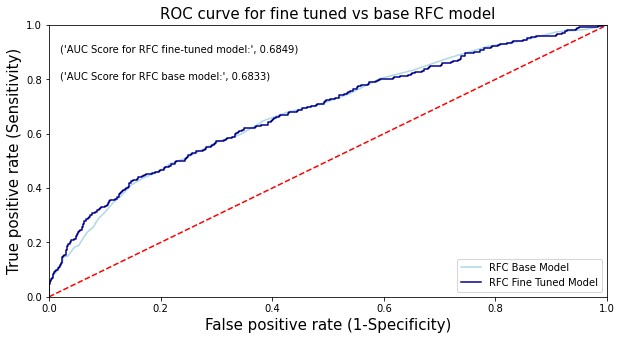

In [45]:
# Plot ROC curve

plt.figure(figsize=(10,5))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='lightblue', label='RFC Base Model')
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFC base model:',round(roc_auc_score(y_test, y_pred_prob),4)))

y_pred_prob = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='darkblue', label='RFC Fine Tuned Model')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for RFC fine-tuned model:',round(roc_auc_score(y_test, y_pred_prob),4)))

## Labelling
plt.title('ROC curve for fine tuned vs base RFC model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')
plt.show()

# There is slight increase in AUC score

<AxesSubplot:xlabel='Importance_rf', ylabel='Features'>

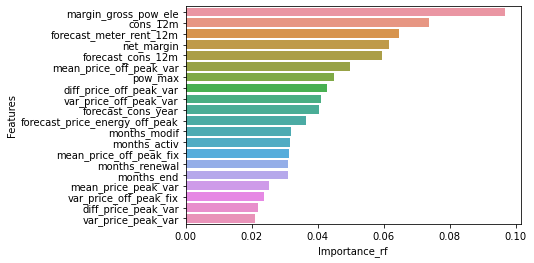

In [46]:
# Feature importance for fine tuned model

important_features = pd.DataFrame({'Features': X_train.columns, 'Importance_rf': rfc_best.feature_importances_})

important_features = important_features.sort_values('Importance_rf', ascending = False)

# fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_rf', y = 'Features', data = important_features[:20])

In [47]:
print('Top 20 important features (total information gain based on gini impurity) for predicting churn are :-')
important_features.iloc[:20]

Top 20 important features (total information gain based on gini impurity) for predicting churn are :-


,Features,Importance_rf
10,margin_gross_pow_ele,0.09663
0,cons_12m,0.07364
5,forecast_meter_rent_12m,0.06450
12,net_margin,0.06150
2,forecast_cons_12m,0.05933
35,mean_price_off_peak_var,0.04977
14,pow_max,0.04502
31,diff_price_off_peak_var,0.04276
39,var_price_off_peak_var,0.04088
3,forecast_cons_year,0.04041


In [48]:
# Interpreting the result of an individual instance using LIME package

import lime
import lime.lime_tabular

prob_predict = lambda x: rfc_best.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = X_train.columns, 
                                                   class_names=['Not churned','Churned'],kernel_width=5)

                                                  
instance = X_test.iloc[2252,:]
# print(instance)
exp = explainer.explain_instance(instance, prob_predict)
exp.show_in_notebook(show_all=False)

# For the particular instance of churn, cons_gas_12m, pow_max, origin, channel are the biggest predictors for churn

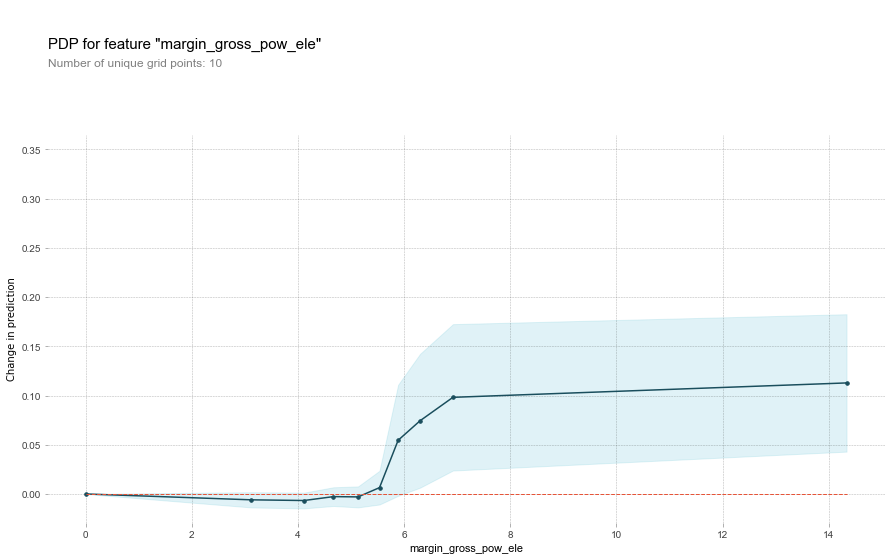

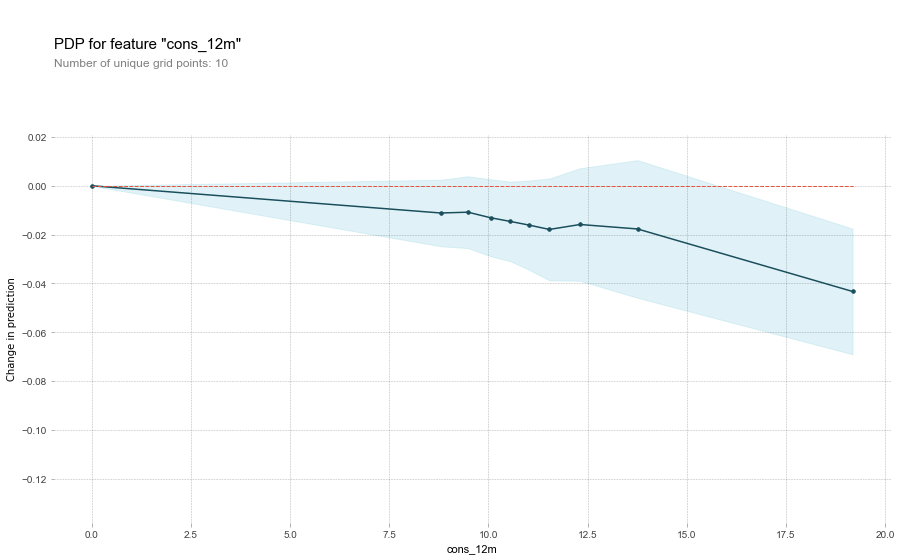

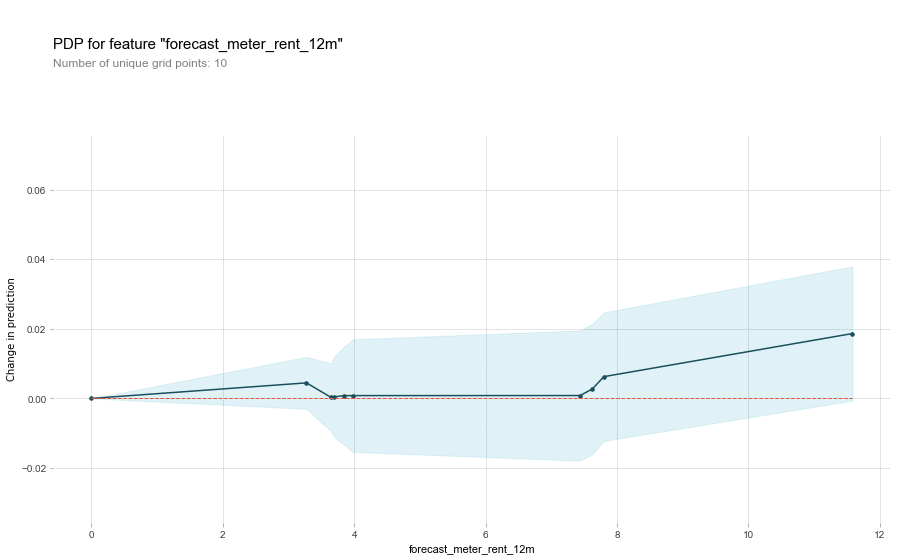

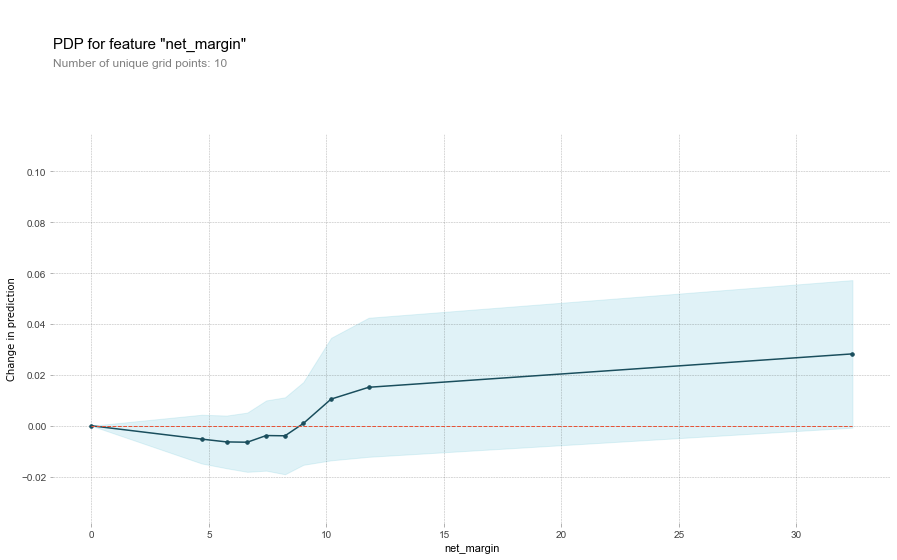

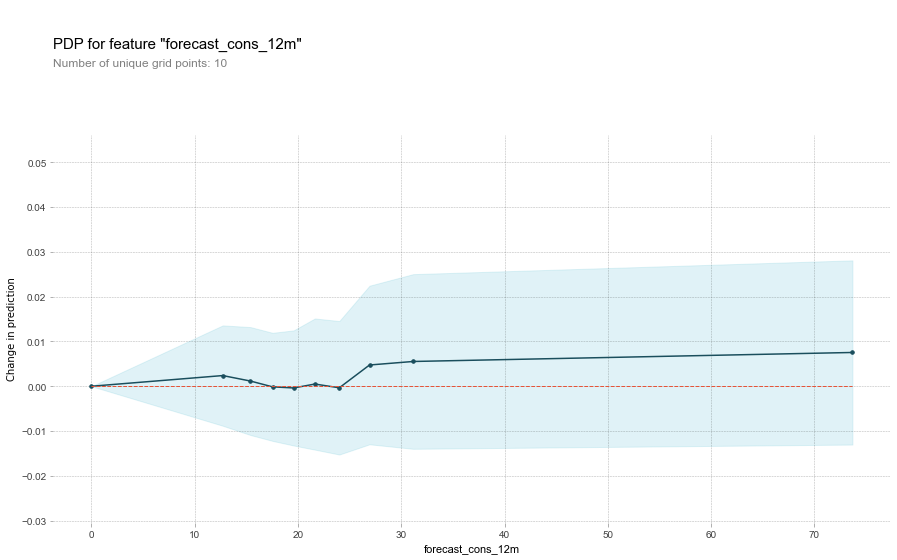

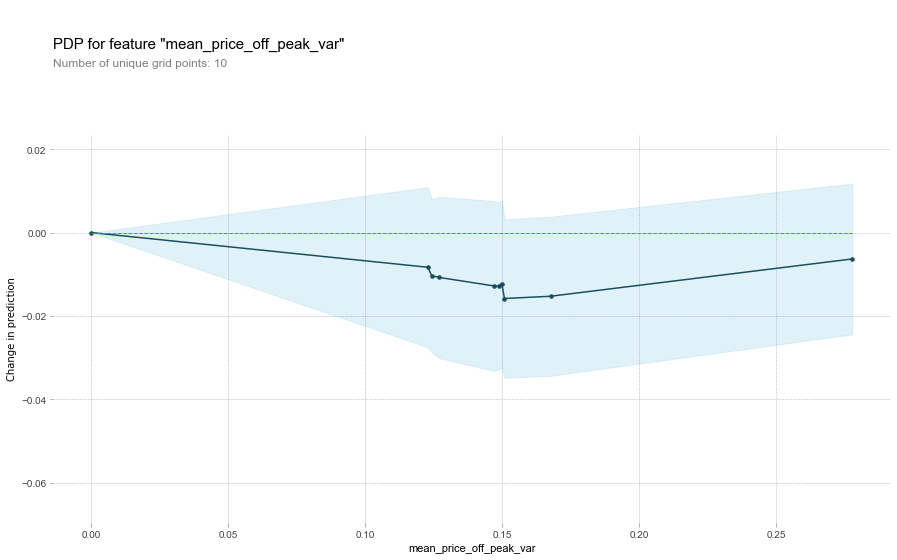

In [57]:
# Create the partial dependency plot for top 6 features

# ! pip install pdpbox
import pdpbox.pdp as pdp
from sklearn import tree

imp_feat = important_features.Features[:6]

for col in imp_feat:
    pdp_feat = pdp.pdp_isolate(rfc_best, X_test, X_test.columns, feature=col)
    pdp.pdp_plot(pdp_feat, col)
    plt.ylabel("Change in prediction")
    plt.show()
    
# x-axis shows the feature data values (log transformed) and y-axis gives the partial dependence

## 9. Conclusion

### Electric power margins on a client (represented by margin_gross_pow_ele and net_margin) and the consumption for last 12 months (represented by cons_12m) emerge as the strongest predictors
### 1) Margin has a positive correlation with churn, which means the customers who are most profitable may also be the most likely to churn.
### 2) Consumption has a negative correlation meaning those customers who are likely to churn may have a reduced consumption now.